# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martin
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.
El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | La danceabilidad describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos danceable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas, ruidosas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [20]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [5]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [11]:
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [12]:
df.tail(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [13]:
df.sample(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2005,4Kfz0zXPH8VcZyqKX27xQU,Love Me Too,Joseph Tilley,40,1EnXxSwNlaOYsWutXvMjgC,Love Me Too,2019-07-05,a taste of the mainstream,4gbXqmZDUFHqlaYjf4uVyS,pop,...,4,-9.471,1,0.2500,0.687000,0.000765,0.0985,0.779,127.974,202500
8736,2tvP8pZhPhUrlvZNH9GTH3,Party Ain't Over,G-Unit,0,3Um5njEfYT2NgowD5m0SDV,T.O.S. (Terminate On Sight),2008-01-01,Gangster Rap | 100 % Gangster,2e0d7otcM1oyecfi3zZPWk,rap,...,1,-3.828,1,0.3960,0.198000,0.000000,0.5090,0.538,66.439,210347
6759,4X1fQMrCbBLSkZKPvhO1Kj,Burbujas de Cristal,Cartel De Santa,72,63x472Q4wWqzhfjUURqAfU,Burbujas de Cristal,2019-12-16,Arena Hip-Hop,37i9dQZF1DWVFZbCNivv6B,rap,...,1,-4.890,1,0.1040,0.221000,0.000000,0.5460,0.461,123.041,224625
8149,69uxyAqqPIsUyTO8txoP2M,Adventure of a Lifetime,Coldplay,74,3cfAM8b8KqJRoIzt3zLKqw,A Head Full of Dreams,2015-12-04,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,7,-3.887,1,0.0359,0.002050,0.000173,0.1490,0.529,111.995,263787
15271,3RTBg6BKtmN7TamQiLEebB,Alien Nation,Scorpions,2,4iEcL6w6bTAIztJbavIPX6,Face The Heat,1993-01-01,This Is Scorpions,37i9dQZF1DWViGKI2U5P2K,rock,...,8,-3.820,1,0.0569,0.000079,0.879000,0.3630,0.325,97.919,344040


In [14]:
# vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [17]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [18]:
# filtramos los campos donde track_popularity es 0 
df_filtered = df[df['track_popularity'] == 0]
df_filtered

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.113,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,2014-03-31,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.654,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000


Text(0.5, 1.0, 'Distribución Track Popularity')

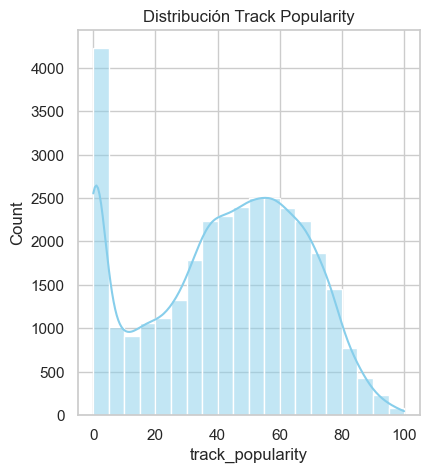

In [24]:
# Graficamos la distribución del campo track_popularity
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['track_popularity'], bins=20, kde=True, color="skyblue")
plt.title('Distribución Track Popularity')